# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf 

# Importing Deep Learning Libraries

from  tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2023-03-23 09:32:57.617224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 09:32:57.797841: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-23 09:32:58.606567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2023-03-23 09:32:58.606689: W tensorflow/co

# Displaying Images

In [2]:
picture_size = 100
folder_path = "Dataset/"

# Making Training and Validation Data

In [3]:
batch_size  = 4

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),

                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1584 images belonging to 7 classes.
Found 198 images belonging to 7 classes.


# Model Building

In [4]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications import VGG19

# Create the InceptionResNetV2 model
input_shape = (100, 100, 3)
base_model = VGG19(include_top=False, weights= None, input_shape=input_shape)

# Flatten the output of the InceptionResNetV2 model
flatten = Flatten()(base_model.output)

# Add a dense layer with 7 units and a softmax activation function
dense = Dense(7, activation='softmax')(flatten)

# Create the final model
model = Model(inputs=base_model.input, outputs=dense)

# Compile the model with the specified parameters
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

2023-03-23 09:33:40.672700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:33:40.714839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:33:40.714913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 09:33:40.716245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

# Fitting the Model with Training and Validation Data 

In [5]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              #optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [8]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                #callbacks=callbacks_list
                                )

Epoch 1/20


/tmp/ipykernel_5093/2350914230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


396/396 [==============================] - 28s 70ms/step - loss: 1.9270 - accuracy: 0.1610 - val_loss: 1.9252 - val_accuracy: 0.1582
Epoch 2/20
396/396 [==============================] - 27s 67ms/step - loss: 1.9273 - accuracy: 0.1458 - val_loss: 1.9257 - val_accuracy: 0.1633
Epoch 3/20
396/396 [==============================] - 28s 72ms/step - loss: 1.9278 - accuracy: 0.1427 - val_loss: 1.9246 - val_accuracy: 0.1633
Epoch 4/20
396/396 [==============================] - 29s 74ms/step - loss: 1.9272 - accuracy: 0.1521 - val_loss: 1.9251 - val_accuracy: 0.1582
Epoch 5/20
396/396 [==============================] - 28s 70ms/step - loss: 1.9269 - accuracy: 0.1439 - val_loss: 1.9270 - val_accuracy: 0.1633
Epoch 6/20
396/396 [==============================] - 27s 68ms/step - loss: 1.9274 - accuracy: 0.1528 - val_loss: 1.9258 - val_accuracy: 0.1633
Epoch 7/20
396/396 [==============================] - 28s 71ms/step - loss: 1.9272 - accuracy: 0.1408 - val_loss: 1.9242 - val_accuracy: 0.1633
Epo

# Plotting Accuracy & Loss

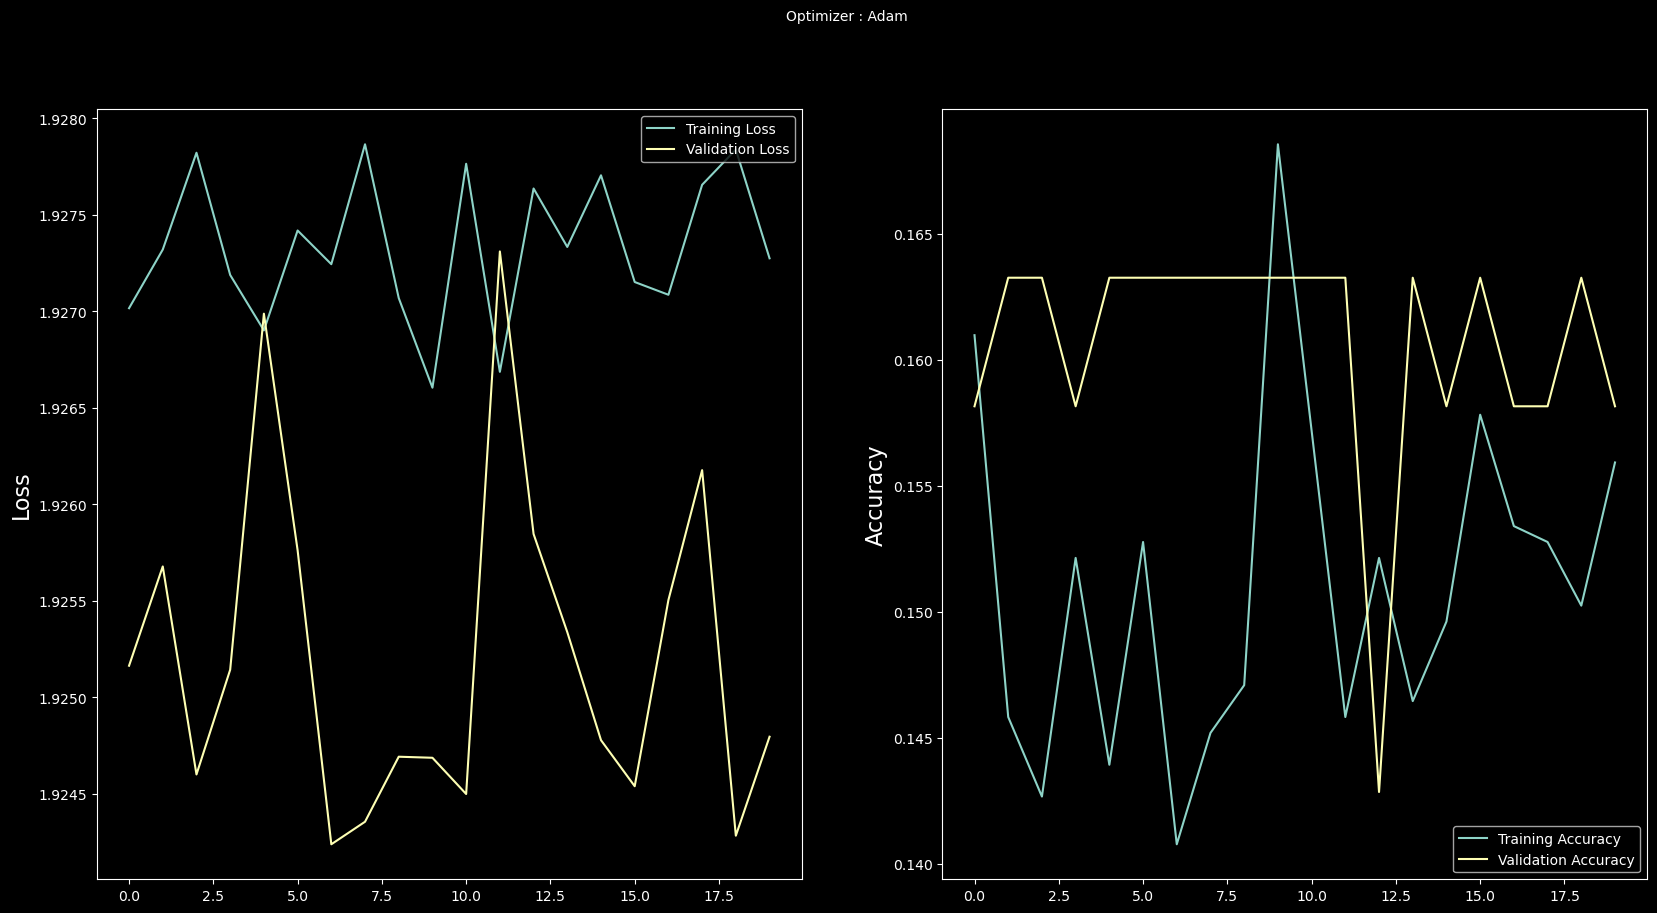

In [9]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def make_predictions(folder_path, model):
    emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    predictions = []
    num_correct = 0
    total_num = 0
   
    for file_name in os.listdir(folder_path):
        if not file_name.endswith('.jpg'):
            continue
       
        # Split the filename into the emotion label and the index
        label, index = file_name.split('_')
        index = int(index.split('.')[0])
       
        img_path = os.path.join(folder_path, file_name)
        img = load_img(img_path)
        img = tf.image.resize(img, (100, 100))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
       
        prediction = model.predict(img)
        predicted_label = emotion_labels[prediction.argmax()]
        predictions.append((file_name, predicted_label))
       
        if predicted_label == label:
            num_correct += 1
       
        total_num += 1
   
    accuracy = num_correct / total_num
    return predictions, accuracy

In [12]:
folder_path = "Dataset/test"
model = model
predictions, accuracy = make_predictions(folder_path, model)
print("Accuracy: {:.2%}".format(accuracy))


1/1 [==============================] - 0s 34ms/step
Accuracy: 15.66%


In [13]:
model.save("Jaffe_V.h5")